In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

(2, 625)


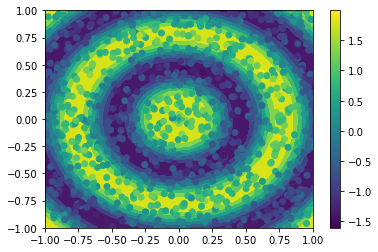

In [2]:
np.random.seed(4)
X = 2*np.random.rand(2,1000) - 1
Y = np.sin(10*np.linalg.norm(X,axis=0,keepdims=True)) + 0.25 * np.random.randn(1,1000)

X0,X1 = np.meshgrid(np.linspace(-1,1,25),np.linspace(-1,1,25))
X_grid = np.vstack([X0.ravel(),X1.ravel()])
print(X_grid.shape)
Y_sin = np.sin(10*np.linalg.norm(X_grid,axis=0,keepdims=True)) 

plt.contourf(X0,X1,Y_sin.reshape(X0.shape))
plt.scatter(X[0],X[1],c=Y)
plt.colorbar()

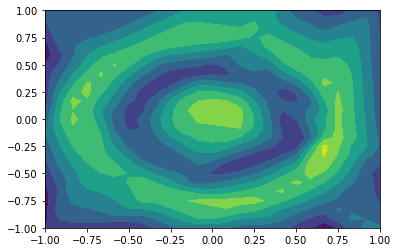

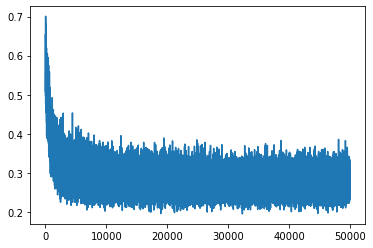

In [10]:
# hyperparameters
n = [10,10] # number of neurons in each layer (dimention is the number of layers)
alpha = 0.01 # Learning rate
lam = 0.001 # Regularization coeficient
m = 100

np.random.seed(5)
W1 = np.random.randn(n[0],X.shape[0])
b1 = np.zeros((n[0],1))

W2 = np.random.randn(n[1],n[0])
b2 = np.zeros((n[1],1))

W3 = np.random.randn(1,n[1])
b3 = np.zeros((1,1))

history = []

for step in range(50000):
    N = X.shape[1]
    shuffle = np.random.permutation(N)
    X_batches = []
    Y_batches = []
    count = 0
    while count < N:
        loc = shuffle[count:min(count+m,N)]
        X_batches.append(X[:,loc])
        Y_batches.append(Y[:,loc])
        count +=m

    for X_batch, Y_batch in zip(X_batches, Y_batches):
    
        Z1 = np.dot(W1,X_batch) + b1
        H1 = Z1 * (Z1>0)
        Z2 = np.dot(W2,H1) + b2
        H2 = Z2 * (Z2 > 0)
        Z3 = np.dot(W3,H2) + b3
        
        # chain rule
        dZ3 = (2 / m) * (Z3 - Y_batch)
        dW3 = np.dot(dZ3,H2.T) + lam * 2 * W3 # L2 regularization
        db3 = np.sum(dZ3,axis=1,keepdims=True)
        
        dH2 = np.dot(W3.T,dZ3)
        
        dZ2 = dH2 * (H2>0)
        dW2 = np.dot(dZ2,H1.T) + lam * 2 * W2
        db2 = np.sum(dZ2,axis=1,keepdims=True)
        
        dH1 = np.dot(W2.T,dZ2)
        
        dZ1 = dH1 * (H1>0)
        dW1 = np.dot(dZ1,X_batch.T) + lam * 2 * W1
        db1 = np.sum(dZ1,axis=1,keepdims=True)
        
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2
        W3 -= alpha * dW3
        b3 -= alpha * db3
        
    mse = np.mean((Z3-Y_batch)**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history.append(mse + lam * penalty)
    
Z1 = np.dot(W1,X_grid) + b1
H1 = Z1 * (Z1>0)
Z2 = np.dot(W2,H1) + b2
H2 = Z2 * (Z2 > 0)
Z3_grid = np.dot(W3,H2) + b3

plt.contourf(X0,X1,Z3_grid.reshape(X0.shape))
    
plt.figure()
plt.plot(history[100:])

In [1]:
# Data from Chen-Pelgas-Zhu
ret = pd.read_csv('data/CharAll_ret.csv').rename(columns={'Unnamed: 0': 'date'})
char = pd.read_csv('data/CharAll_char.csv').rename(columns={'Unnamed: 0': 'date'})
ret.head()

,date,permno,ret
0,1967-01-01,10006,0.136223
1,1967-01-01,10014,0.317129
2,1967-01-01,10102,0.101064
3,1967-01-01,10145,0.287367
4,1967-01-01,10153,0.143427


In [2]:
char.head()

,date,permno,A2ME,AC,AT,ATO,BEME,Beta,C,CF,...,Resid_Var,RNA,ROA,ROE,S2P,SGA2S,Spread,ST_REV,SUV,Variance
0,1967-01-01,10006,0.108392,0.243590,0.152681,-0.182984,0.113054,0.185315,0.113054,-0.271562,...,-0.224942,0.045455,0.059441,0.080420,-0.015152,-0.383450,-0.164336,-0.241259,-0.325175,-0.182984
1,1967-01-01,10014,0.455711,-0.360140,-0.472028,0.257576,0.453380,0.318182,0.122378,0.071096,...,0.483683,0.038462,-0.346154,-0.245921,0.439394,-0.175991,0.439394,-0.399767,-0.064103,0.483683
2,1967-01-01,10102,0.050117,0.050117,0.206294,-0.276224,0.096737,0.068765,-0.294872,-0.325175,...,-0.129371,-0.145688,-0.136364,-0.134033,-0.108392,0.001166,0.115385,0.500000,0.273893,0.026807
3,1967-01-01,10145,-0.031469,0.019814,0.416084,-0.252914,0.005828,-0.297203,-0.493007,-0.313520,...,-0.460373,-0.136364,-0.059441,-0.099068,-0.173660,-0.178322,0.024476,-0.001166,0.378788,-0.357809
4,1967-01-01,10153,0.371795,0.497669,0.280886,-0.175991,0.362471,0.325175,-0.346154,-0.080420,...,0.071096,-0.278555,-0.392774,-0.383450,0.299534,-0.189977,0.292541,0.152681,-0.304196,0.248252


In [3]:
ret.tail()
#permno is a identificator for firms, this is panel data.
# different firms in each month.

,date,permno,ret
1218550,2016-12-01,93373,-0.194911
1218551,2016-12-01,93397,0.201762
1218552,2016-12-01,93399,0.002213
1218553,2016-12-01,93422,-0.063881
1218554,2016-12-01,93423,0.039950


<AxesSubplot:>

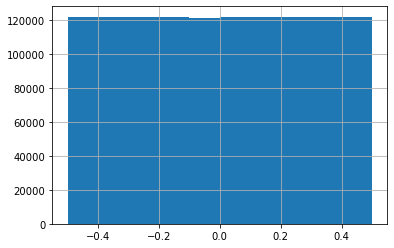

In [4]:
char['A2ME'].hist() # the data has been cleaned and normalized by the authors

In [5]:
df = ret.merge(char, on=['date','permno'])
Y = df['ret'].values.reshape(1,-1)
X = df.drop(columns=['ret', 'date', 'permno']).values.T

In [6]:
print(Y.shape) # Target
print(X.shape) # Features

(1, 1218555)
(46, 1218555)


In [17]:
train = (df['date'] < '1987-01-01').values
validation = ((df['date']>='1987-01-01') & (df['date']< '1997-01-01'))
test = (df['date'] >= '1997-01-01000')

print(train)
print(train.shape)
print(np.sum(test))

[ True  True  True ... False False False]
(1218555,)
593072


# hyperparameters
n = [10,10] # number of neurons in each layer (dimention is the number of layers)
alpha = 0.01 # Learning rate
lam = 0 # Regularization coeficient
m = 1000

np.random.seed(5)
W1 = np.random.randn(n[0],X.shape[0])
b1 = np.zeros((n[0],1))

W2 = np.random.randn(n[1],n[0])
b2 = np.zeros((n[1],1))

W3 = np.random.randn(1,n[1])
b3 = np.zeros((1,1))

history_trian = []
history_val = []

for step in range(100):
    N = X_train.shape[1]
    shuffle = np.random.permutation(N)
    X_batches = []
    Y_batches = []
    count = 0
    while count < N:
        loc = shuffle[count:min(count+m,N)]
        X_batches.append(X_train[:,loc])
        Y_batches.append(Y_train[:,loc])
        count +=m

    for X_batch, Y_batch in zip(X_batches, Y_batches):
    
        Z1 = np.dot(W1,X_batch) + b1
        H1 = Z1 * (Z1>0)
        Z2 = np.dot(W2,H1) + b2
        H2 = Z2 * (Z2 > 0)
        Z3 = np.dot(W3,H2) + b3
        
        # chain rule
        dZ3 = (2 / m) * (Z3 - Y_batch)
        dW3 = np.dot(dZ3,H2.T) + lam * 2 * W3 # L2 regularization
        db3 = np.sum(dZ3,axis=1,keepdims=True)
        
        dH2 = np.dot(W3.T,dZ3)
        
        dZ2 = dH2 * (H2>0)
        dW2 = np.dot(dZ2,H1.T) + lam * 2 * W2
        db2 = np.sum(dZ2,axis=1,keepdims=True)
        
        dH1 = np.dot(W2.T,dZ2)
        
        dZ1 = dH1 * (H1>0)
        dW1 = np.dot(dZ1,X_batch.T) + lam * 2 * W1
        db1 = np.sum(dZ1,axis=1,keepdims=True)
        
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2
        W3 -= alpha * dW3
        b3 -= alpha * db3
        
    mse = np.mean((Z3-Y_val
    )**2)
    penalty = np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2)
    history.append(mse + lam * penalty)
    
Z1 = np.dot(W1,X_val) + b1
H1 = Z1 * (Z1>0)
Z2 = np.dot(W2,H1) + b2
H2 = Z2 * (Z2 > 0)
Z3_grid = np.dot(W3,H2) + b3

plt.figure()
plt.plot(history[100:])